![Cabec%CC%A7alho_notebook.png](cabecalho_notebook.png)

# Classificação de Atividade Humana com PCA

Vamos trabalhar com a base da demonstração feita em aula, mas vamos explorar um pouco melhor como é o desempenho da árvore variando o número de componentes principais.

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix


filename_features = "../Input/UCI HAR Dataset/features.txt"
filename_labels = "../Input/UCI HAR Dataset/activity_labels.txt"

filename_subtrain = "../Input/UCI HAR Dataset/train/subject_train.txt"
filename_xtrain = "../Input/UCI HAR Dataset/train/X_train.txt"
filename_ytrain = "../Input/UCI HAR Dataset/train/y_train.txt"

filename_subtest = "../Input/UCI HAR Dataset/test/subject_test.txt"
ffilename_xtest = "../Input/UCI HAR Dataset/test/X_test.txt"
filename_ytest = "../Input/UCI HAR Dataset/test/y_test.txt"

features = pd.read_csv(filename_features, header=None, names=['nome_var'], squeeze=True, sep="#")
labels = pd.read_csv(filename_labels, delim_whitespace=True, header=None, names=['cod_label', 'label'])

subject_train = pd.read_csv(filename_subtrain, header=None, names=['subject_id'], squeeze=True)
X_train = pd.read_csv(filename_xtrain, delim_whitespace=True, header=None, names=features.tolist())
y_train = pd.read_csv(filename_ytrain, header=None, names=['cod_label'])

subject_test = pd.read_csv(filename_subtest, header=None, names=['subject_id'], squeeze=True)
X_test = pd.read_csv(ffilename_xtest, delim_whitespace=True, header=None, names=features.tolist())
y_test = pd.read_csv(filename_ytest, header=None, names=['cod_label'])

C:\Users\raise\AppData\Local\Temp\ipykernel_13828\2524412903.py:23: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  features = pd.read_csv(filename_features, header=None, names=['nome_var'], squeeze=True, sep="#")
C:\Users\raise\AppData\Local\Temp\ipykernel_13828\2524412903.py:26: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  subject_train = pd.read_csv(filename_subtrain, header=None, names=['subject_id'], squeeze=True)
C:\Users\raise\AppData\Local\Temp\ipykernel_13828\2524412903.py:30: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  subject_test = pd.read_csv(filename_subtest, header=None, names=['subject_id'], squeeze=True)


In [153]:
def screeplot(princomp, princomp1, ncomp = 0, varexplicada=0, criterio=1):
    
    if ncomp>0:
        ncomp_crit=ncomp
        ncomp_crit1=ncomp
    elif varexplicada > 0:
        ncomp_crit = (princomp.explained_variance_ratio_.cumsum()<varexplicada).sum()+1 
        ncomp_crit1 = (princomp1.explained_variance_ratio_.cumsum()<varexplicada).sum()+1 
        # Critério 1: autovalor padronizado > 1
    elif criterio == 1:
        ncomp_crit = (princomp.explained_variance_ratio_>1/princomp.n_components_).sum()
        ncomp_crit1 = (princomp1.explained_variance_ratio_>1/princomp.n_components_).sum()
    else: ncomp_crit = None
    
    fig, ax = plt.subplots(2, 2, sharex=True, figsize=(14, 8))
    plt.subplots_adjust(hspace=0, wspace=.15)


    num_componentes = np.arange(princomp.n_components_) + 1
    num_componentes1 = np.arange(princomp1.n_components_) + 1
    ax[0,0].plot(num_componentes, princomp.explained_variance_, 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
    ax[0,0].plot(num_componentes, princomp1.explained_variance_, 'o-', linewidth=2, color='red', markersize=2, alpha=.2)
    ax[0,0].set_title('Scree Plot - Variância total')
    ax[0,0].set_xlabel('Número de componentes')
    ax[0,0].set_ylabel('Variancia explicada (Autovalores)')

    ax[1,0].plot(num_componentes, princomp.explained_variance_.cumsum(), 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
    ax[1,0].plot(num_componentes, princomp1.explained_variance_.cumsum(), 'o-', linewidth=2, color='red', markersize=2, alpha=.2)
    ax[1,0].set_xlabel('Número de componentes')
    ax[1,0].set_ylabel('Variancia explicada (Acumulada)')


    ax[0,1].plot(num_componentes, princomp.explained_variance_ratio_, 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
    ax[0,1].plot(num_componentes, princomp1.explained_variance_ratio_, 'o-', linewidth=2, color='red', markersize=2, alpha=.2)
    ax[0,1].set_title('Scree Plot - Variância percentual')
    ax[0,1].set_xlabel('Número de componentes')
    ax[0,1].set_ylabel('Variancia explicada (percentual)')

    ax[1,1].plot(num_componentes, princomp.explained_variance_ratio_.cumsum(), 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
    ax[1,1].plot(num_componentes, princomp1.explained_variance_ratio_.cumsum(), 'o-', linewidth=2, color='red', markersize=2, alpha=.2)
    ax[1,1].set_xlabel('Número de componentes')
    ax[1,1].set_ylabel('Variancia explicada (% Acumulado)')
    
    if ncomp_crit != None:
        # Linhas verticais de referência
        ax[0,0].axvline(x = ncomp_crit, color = 'r', linestyle = '-', linewidth=.5)
        ax[1,1].axvline(x = ncomp_crit, color = 'r', linestyle = '-', linewidth=.5)
        ax[1,0].axvline(x = ncomp_crit, color = 'r', linestyle = '-', linewidth=.5)
        ax[0,1].axvline(x = ncomp_crit, color = 'r', linestyle = '-', linewidth=.5)
        ax[0,0].axvline(x = ncomp_crit1, color = 'b', linestyle = '-', linewidth=.5)
        ax[1,1].axvline(x = ncomp_crit1, color = 'b', linestyle = '-', linewidth=.5)
        ax[1,0].axvline(x = ncomp_crit1, color = 'b', linestyle = '-', linewidth=.5)
        ax[0,1].axvline(x = ncomp_crit1, color = 'b', linestyle = '-', linewidth=.5)


        # linhas horizontais
        variancia               = princomp.explained_variance_[ncomp_crit-1]
        variancia_acumulada     = princomp.explained_variance_.cumsum()[ncomp_crit-1]
        pct_variancia           = princomp.explained_variance_ratio_[ncomp_crit-1]
        pct_variancia_acumulada = princomp.explained_variance_ratio_.cumsum()[ncomp_crit-1]
        #Linhas da segunda
        variancia1               = princomp1.explained_variance_[ncomp_crit1-1]
        variancia_acumulada1     = princomp1.explained_variance_.cumsum()[ncomp_crit1-1]
        pct_variancia1           = princomp1.explained_variance_ratio_[ncomp_crit1-1]
        pct_variancia_acumulada1 = princomp1.explained_variance_ratio_.cumsum()[ncomp_crit1-1]
        
        ax[0,0].axhline(y = variancia              , color = 'r', linestyle = '-', linewidth=.5)
        ax[1,0].axhline(y = variancia_acumulada    , color = 'r', linestyle = '-', linewidth=.5)
        ax[0,1].axhline(y = pct_variancia          , color = 'r', linestyle = '-', linewidth=.5)
        ax[1,1].axhline(y = pct_variancia_acumulada, color = 'r', linestyle = '-', linewidth=.5)
        
        ax[0,0].axhline(y = variancia1              , color = 'b', linestyle = '-', linewidth=.5)
        ax[1,0].axhline(y = variancia_acumulada1    , color = 'b', linestyle = '-', linewidth=.5)
        ax[0,1].axhline(y = pct_variancia1          , color = 'b', linestyle = '-', linewidth=.5)
        ax[1,1].axhline(y = pct_variancia_acumulada1, color = 'b', linestyle = '-', linewidth=.5)


    print(f'Número de componentes:............... {ncomp_crit}')
    print(f'Variância da ultima CP:.............. {variancia:.2f}' )
    print(f'Variância total explicada:........... {variancia_acumulada:.2f}' )
    print(f'Variância percentual da última CP:... {100*pct_variancia:.2f}%' )
    print(f'Variância percentual total explicada: {100*pct_variancia_acumulada:.2f}%' )
    print("#"*40)
    print(f'Abaixo as informações da segunda variavel PCA.')
    print(f'Número de componentes:............... {ncomp_crit1}')
    print(f'Variância da ultima CP:.............. {variancia1:.2f}' )
    print(f'Variância total explicada:........... {variancia_acumulada1:.2f}' )
    print(f'Variância percentual da última CP:... {100*pct_variancia1:.2f}%' )
    print(f'Variância percentual total explicada: {100*pct_variancia_acumulada1:.2f}%' )
    plt.show()
    return ncomp_crit, ncomp_crit1

## PCA com variáveis padronizadas

Reflexão sobre a escala das variáveis:

**Variáveis em métricas muito diferentes** podem interferir na análise de componentes principais. Lembra que variância é informação pra nós? Pois bem, tipicamente se há uma variável monetária como salário, vai ter uma ordem de variabilidade bem maior que número de filhos, tempo de emprego ou qualquer variável dummy. Assim, as variáveis de maior variância tendem a "dominar" a análise. Nesses casos é comum usar a padronização das variáveis.

Faça duas análises de componentes principais para a base do HAR - com e sem padronização e compare:

- A variância explicada por componente
- A variância explicada acumulada por componente
- A variância percentual por componente
- A variância percentual acumulada por componente
- Quantas componentes você escolheria, em cada caso para explicar 90% da variância?

In [154]:
%%time

def padroniza(s):
    if s.std() > 0:
        s = (s - s.mean())/s.std()
    return s

X_train_pad = pd.DataFrame(X_train).apply(padroniza, axis=0)
X_test_pad = pd.DataFrame(X_test).apply(padroniza, axis=0)
X_train_pad.head()

Wall time: 2.3 s


,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
0,0.200628,-0.063678,-0.419600,-0.868755,-0.939377,-0.737479,-0.859758,-0.938955,-0.766385,-0.855978,...,-0.795305,0.025958,-0.276380,-0.360579,0.062935,-0.778374,-0.026079,-0.687172,0.407918,-0.007567
1,0.055944,0.031484,-0.253891,-0.875366,-0.923839,-0.849247,-0.868472,-0.921936,-0.848870,-0.871300,...,0.130605,-0.897296,-0.767938,0.133002,-0.021460,-1.218722,1.484369,-0.694091,0.409089,0.007875
2,0.073510,-0.043414,-0.076289,-0.868980,-0.907698,-0.893724,-0.863078,-0.898793,-0.896640,-0.863264,...,1.152257,-0.260860,-0.438286,-0.377815,0.391949,0.151197,1.704085,-0.702191,0.410260,0.026501
3,0.066691,-0.208407,-0.249695,-0.870566,-0.939959,-0.921743,-0.864445,-0.938060,-0.925216,-0.863264,...,1.112694,0.591005,0.463123,-0.135016,-0.033635,1.037781,-1.002951,-0.701636,0.414622,0.031712
4,0.030467,0.027585,-0.109840,-0.875128,-0.934815,-0.921281,-0.867325,-0.931726,-0.927965,-0.870201,...,-0.149567,-0.138505,-0.240296,0.340383,0.268468,1.125841,-1.276196,-0.700104,0.425434,0.045222


In [155]:
%time
pcomp1 = PCA().fit(X_train_pad)

Wall time: 0 ns


In [156]:
print(f'A variância explicada por componente:\n {pcomp1.explained_variance_[0:20]}\n')
print(f'A variância explicada acumuluda por componente:\n {pcomp1.explained_variance_.cumsum()[0:20]}\n')
print(f'A variância percentual por componente:\n {pcomp1.explained_variance_ratio_[0:20]}\n ')
print(f'A variância percentual acumulada por componente:\n {pcomp1.explained_variance_ratio_.cumsum()[0:20]}\n ')

A variância explicada por componente:
 [284.88237655  36.9176163   15.74411031  14.0471749   10.59327893
   9.67167599   7.69137434   6.72682578   5.58677186   5.41413577
   4.82488975   4.48957613   4.28601963   3.62029526   3.54733958
   3.36444093   3.29166919   3.22803547   3.18603707   2.95812932]

A variância explicada acumuluda por componente:
 [284.88237655 321.79999285 337.54410316 351.59127806 362.18455699
 371.85623299 379.54760733 386.27443311 391.86120496 397.27534074
 402.10023049 406.58980662 410.87582624 414.49612151 418.04346109
 421.40790202 424.69957121 427.92760668 431.11364375 434.07177307]

A variância percentual por componente:
 [0.50781172 0.0658068  0.02806437 0.02503953 0.01888285 0.01724006
 0.01371011 0.01199078 0.0099586  0.00965087 0.00860052 0.00800281
 0.00763996 0.00645329 0.00632324 0.00599722 0.0058675  0.00575407
 0.00567921 0.00527296]
 
A variância percentual acumulada por componente:
 [0.50781172 0.57361853 0.60168289 0.62672242 0.64560527 0.66284

In [157]:
pcomp2 = PCA().fit(X_train)

In [158]:
print(f'A variância explicada por componente:\n {pcomp2.explained_variance_[0:20]}\n')
print(f'A variância explicada acumuluda por componente:\n {pcomp2.explained_variance_.cumsum()[0:20]}\n')
print(f'A variância percentual por componente:\n {pcomp2.explained_variance_ratio_[0:20]}\n ')
print(f'A variância percentual acumulada por componente:\n {pcomp2.explained_variance_ratio_.cumsum()[0:20]}\n ')

A variância explicada por componente:
 [34.82363041  2.73504627  2.29439284  1.04377529  0.943517    0.7081523
  0.6550526   0.59509008  0.53964712  0.47765287  0.42436828  0.37434592
  0.32255894  0.31056835  0.27774855  0.26439454  0.26008712  0.24027872
  0.23699274  0.22846412]

A variância explicada acumuluda por componente:
 [34.82363041 37.55867667 39.85306951 40.89684481 41.84036181 42.54851411
 43.20356671 43.79865679 44.3383039  44.81595677 45.24032505 45.61467096
 45.9372299  46.24779825 46.52554681 46.78994135 47.05002846 47.29030718
 47.52729992 47.75576404]

A variância percentual por componente:
 [0.6255444  0.04913023 0.04121467 0.01874956 0.0169486  0.01272069
 0.01176685 0.01068973 0.0096938  0.00858018 0.00762302 0.00672446
 0.0057942  0.00557881 0.00498926 0.00474938 0.004672   0.00431618
 0.00425715 0.00410395]
 
A variância percentual acumulada por componente:
 [0.6255444  0.67467463 0.7158893  0.73463886 0.75158746 0.76430816
 0.77607501 0.78676474 0.79645854 0.8

Número de componentes:............... 63
Variância da ultima CP:.............. 0.99
Variância total explicada:........... 505.20
Variância percentual da última CP:... 0.18%
Variância percentual total explicada: 90.05%
########################################
Abaixo as informações da segunda variavel PCA.
Número de componentes:............... 34
Variância da ultima CP:.............. 0.13
Variância total explicada:........... 50.15
Variância percentual da última CP:... 0.24%
Variância percentual total explicada: 90.09%


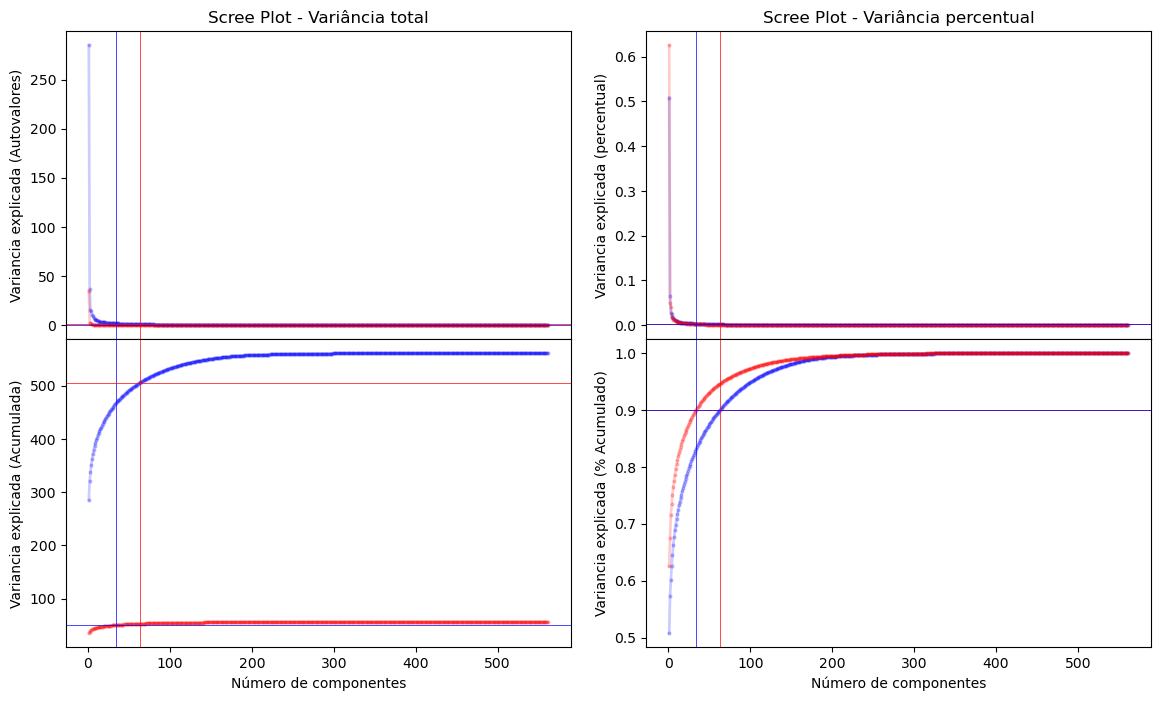

In [159]:
ncomp1, ncomp2 = screeplot(pcomp1, pcomp2, varexplicada=0.90)

### Análise:
    Ao utilizar a base de dados padronizada, observa-se o uso de um número significativamente maior de variáveis em comparação à base não padronizada. Na base padronizada, foram gerados 63 componentes principais, enquanto na base não padronizada foram obtidos apenas 34 componentes principais.

## Árvore com PCA

Faça duas uma árvore de decisão com 10 componentes principais - uma com base em dados padronizados e outra sem padronizar. Utilize o ```ccp_alpha=0.001```.

Compare a acurácia na base de treino e teste.

In [160]:
%%time

pc_X_train_pad = pcomp1.transform(X_train_pad)
pc_X_test_pad = pcomp1.transform(X_test_pad)

n = 10

colunas = ['cp'+str(x+1) for x in list(range(n))]

pc_train_pad = pd.DataFrame(pc_X_train_pad[:, :n], columns=colunas)
pc_test_pad = pd.DataFrame(pc_X_test_pad[:, :n], columns=colunas)

clf_pad = DecisionTreeClassifier(random_state=1234, ccp_alpha=0.001).fit(pc_train_pad, y_train)

acc_train_pad = clf_pad.score(pc_train_pad, y_train)
acc_test_pad = clf_pad.score(pc_test_pad, y_test)

print(f'A acurácia base de treino com padronização é: {acc_train_pad*100:.2f}%')
print(f'A acurácia base de teste com padronização é: {acc_test_pad*100:.2f}%')

A acurácia base de treino com padronização é: 85.87%
A acurácia base de teste com padronização é: 77.37%
Wall time: 1.23 s


In [161]:
%%time

pc_X_train = pcomp2.transform(X_train)
pc_X_test = pcomp2.transform(X_test)

n = 10

colunas = ['cp'+str(x+1) for x in list(range(n))]

pc_train = pd.DataFrame(pc_X_train_pad[:, :n], columns=colunas)
pc_test = pd.DataFrame(pc_X_test_pad[:, :n], columns=colunas)

clf = DecisionTreeClassifier(random_state=1234, ccp_alpha=0.001).fit(pc_train, y_train)

acc_train = clf.score(pc_train, y_train)
acc_test = clf.score(pc_test, y_test)

print(f'A acurácia base de treino sem padronização é: {acc_train*100:.2f}%')
print(f'A acurácia base de teste sem padronização é: {acc_test*100:.2f}%')

A acurácia base de treino sem padronização é: 85.87%
A acurácia base de teste sem padronização é: 77.37%
Wall time: 1.21 s


C:\Users\raise\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


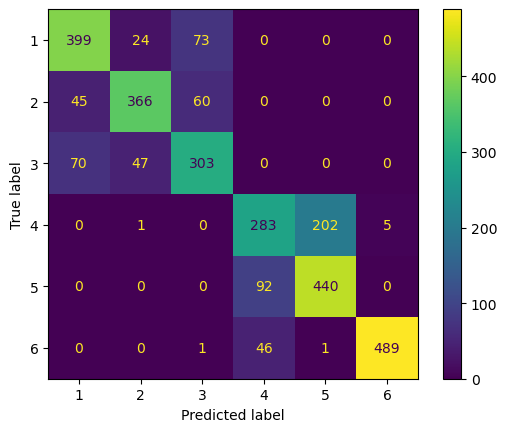

In [162]:
plot_confusion_matrix(clf_pad, pc_test_pad, y_test);

C:\Users\raise\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


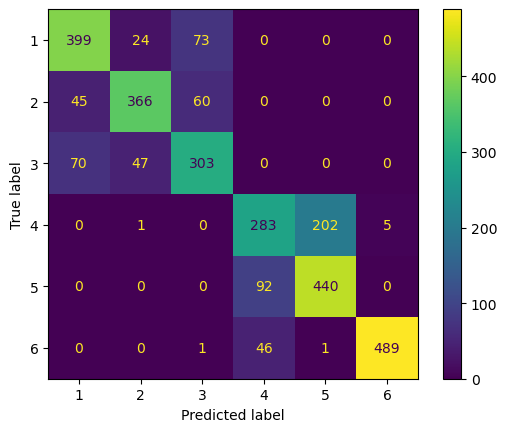

In [163]:
plot_confusion_matrix(clf, pc_test, y_test);

### Analise: 
    Observou-se que não há diferença substancial na acurácia entre as duas bases de dados, uma com padronização e outra sem.